In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans 

In [55]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


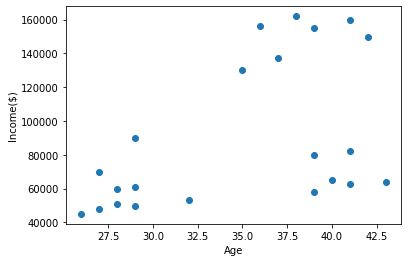

In [56]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [57]:
km = KMeans(n_clusters=3)

In [58]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [59]:
df['cluster'] = y_pred
df.head(3)

# Cluster 0 : $0 - $65,000
# Cluster 1 : $110,000+
# Cluster 2 : $65,000 - $110,000

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2


In [60]:
centroids = km.cluster_centers_
centroids

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

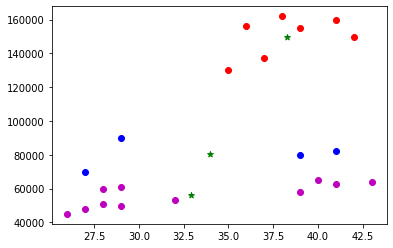

In [61]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

def plot_clusters(df:pd.DataFrame, color, col1='Age', col2='Income($)') -> plt.scatter:
    return plt.scatter(df[col1], df[col2], color=color)

plot_clusters(df0, 'b')
plot_clusters(df1, 'r')
plot_clusters(df2, 'm')
plt.scatter(centroids[:,0], centroids[:,1], color='g', marker='*', label='centroid')
plt.show()

In [16]:
# Scaling the dataset
scale = MinMaxScaler()
scale.fit(df[['Income($)']])
df['Income($)'] = scale.transform(df[['Income($)']])

scale.fit(df[['Age']])
df['Age'] = scale.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


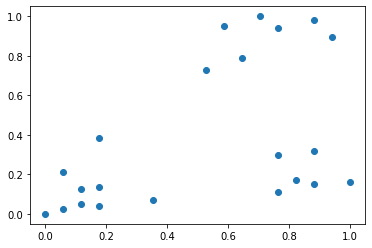

In [19]:
plt.scatter(df.Age, df['Income($)'])
plt.show()

In [20]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [23]:
centroids = km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

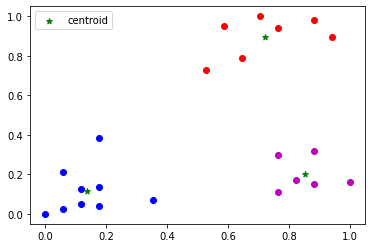

In [26]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plot_clusters(df0, 'b')
plot_clusters(df1, 'r')
plot_clusters(df2, 'm')
plt.scatter(centroids[:,0], centroids[:,1], color='g', marker='*', label='centroid')
plt.legend()
plt.show()

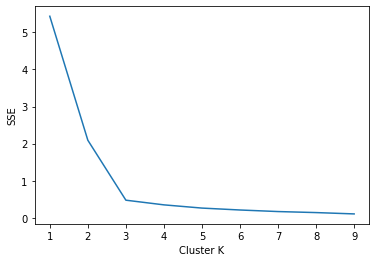

In [27]:
sse = [] # Sum of Squared Errors
k = range(1, 10)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df[['Age', 'Income($)']])
    sse.append(model.inertia_)

plt.plot(k, sse)
plt.xlabel('Cluster K')
plt.ylabel('SSE')
plt.show()

## Kaggle Dataset Clustering Example

In [31]:
used_car = pd.read_csv('Used_Car_Price_Data.csv')
used_car

,Name,Price($),Milage,Review,Review_count,Badge
0,2021 Toyota Camry SE,"31,150","13,390",4.5,659,Good Deal
1,2021 Toyota Supra 3.0 Premium,"58,981","7,348",4.8,"2,744",Great Deal
2,2019 Toyota Sequoia Platinum,"51,999","55,121",4.5,"2,092",Great Deal
3,2019 Toyota Camry SE,"25,689","49,126",1.0,1,Good Deal
4,2017 Toyota Highlander Limited,"31,591","84,621",4.9,"1,745",Good Deal
...,...,...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,"36,981","11,872",4.4,640,Good Deal
996,2010 Toyota Prius IV,"7,995","1,90,884",4.7,"1,432",Good Deal
997,2000 Toyota 4Runner SR5,"15,995","1,45,199",4.1,11,Home Delivery
998,2019 Toyota Corolla LE,"19,989","23,814",4.9,337,Good Deal


In [34]:
used_car['Price($)'], used_car['Milage'] = used_car['Price($)'].str.replace(',', ''), used_car['Milage'].str.replace(',', '')
used_car

,Name,Price($),Milage,Review,Review_count,Badge
0,2021 Toyota Camry SE,31150,13390,4.5,659,Good Deal
1,2021 Toyota Supra 3.0 Premium,58981,7348,4.8,"2,744",Great Deal
2,2019 Toyota Sequoia Platinum,51999,55121,4.5,"2,092",Great Deal
3,2019 Toyota Camry SE,25689,49126,1.0,1,Good Deal
4,2017 Toyota Highlander Limited,31591,84621,4.9,"1,745",Good Deal
...,...,...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,36981,11872,4.4,640,Good Deal
996,2010 Toyota Prius IV,7995,190884,4.7,"1,432",Good Deal
997,2000 Toyota 4Runner SR5,15995,145199,4.1,11,Home Delivery
998,2019 Toyota Corolla LE,19989,23814,4.9,337,Good Deal


In [36]:
used_car['Price($)'], used_car['Milage'] = pd.to_numeric(used_car['Price($)']), pd.to_numeric(used_car['Milage'])
used_car

,Name,Price($),Milage,Review,Review_count,Badge
0,2021 Toyota Camry SE,31150,13390,4.5,659,Good Deal
1,2021 Toyota Supra 3.0 Premium,58981,7348,4.8,"2,744",Great Deal
2,2019 Toyota Sequoia Platinum,51999,55121,4.5,"2,092",Great Deal
3,2019 Toyota Camry SE,25689,49126,1.0,1,Good Deal
4,2017 Toyota Highlander Limited,31591,84621,4.9,"1,745",Good Deal
...,...,...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,36981,11872,4.4,640,Good Deal
996,2010 Toyota Prius IV,7995,190884,4.7,"1,432",Good Deal
997,2000 Toyota 4Runner SR5,15995,145199,4.1,11,Home Delivery
998,2019 Toyota Corolla LE,19989,23814,4.9,337,Good Deal


In [37]:
cleaned_data = used_car[['Name', 'Price($)', 'Milage']]
cleaned_data

,Name,Price($),Milage
0,2021 Toyota Camry SE,31150,13390
1,2021 Toyota Supra 3.0 Premium,58981,7348
2,2019 Toyota Sequoia Platinum,51999,55121
3,2019 Toyota Camry SE,25689,49126
4,2017 Toyota Highlander Limited,31591,84621
...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,36981,11872
996,2010 Toyota Prius IV,7995,190884
997,2000 Toyota 4Runner SR5,15995,145199
998,2019 Toyota Corolla LE,19989,23814


In [40]:
cleaned_data.corr()

,Price($),Milage
Price($),1.000000,-0.479431
Milage,-0.479431,1.000000


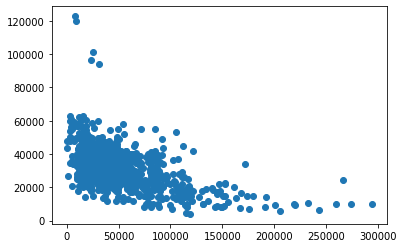

In [41]:
plt.scatter(cleaned_data['Milage'], cleaned_data['Price($)'])
plt.show()

In [44]:
car_cluster = KMeans(n_clusters=4)
y_pred = car_cluster.fit_predict(cleaned_data[['Milage', 'Price($)']])
cleaned_data['Cluster'] = y_pred
cleaned_data

C:\Users\daiya\AppData\Local\Temp\ipykernel_8880\1023334314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = y_pred


,Name,Price($),Milage,Cluster
0,2021 Toyota Camry SE,31150,13390,2
1,2021 Toyota Supra 3.0 Premium,58981,7348,2
2,2019 Toyota Sequoia Platinum,51999,55121,0
3,2019 Toyota Camry SE,25689,49126,0
4,2017 Toyota Highlander Limited,31591,84621,3
...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,36981,11872,2
996,2010 Toyota Prius IV,7995,190884,1
997,2000 Toyota 4Runner SR5,15995,145199,1
998,2019 Toyota Corolla LE,19989,23814,2


In [45]:
y_pred

array([2, 2, 0, 0, 3, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 0, 2, 0, 3, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 3, 3, 3, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 0, 2, 0, 3, 3, 2,
       3, 1, 0, 3, 0, 2, 2, 2, 3, 0, 0, 3, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0,
       2, 3, 3, 0, 3, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 3, 0, 1, 2, 2, 0, 1, 0, 2, 0, 3, 0, 1, 0, 2, 0,
       3, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 3, 0, 2,
       3, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 3, 1, 3, 2, 2, 0, 1, 0, 3, 2, 0,
       1, 0, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 2, 0, 1,
       0, 0, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 2,
       3, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 3, 0, 2, 3, 3, 1,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 3, 2, 3, 3, 0, 2,
       2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 2, 0, 3, 2, 0,

In [46]:
car_scale = MinMaxScaler()
car_scale.fit(cleaned_data[['Price($)']])
cleaned_data['Price($)'] = car_scale.transform(cleaned_data[['Price($)']])

car_scale.fit(cleaned_data[['Milage']])
cleaned_data['Milage'] = car_scale.transform(cleaned_data[['Milage']])

cleaned_data

C:\Users\daiya\AppData\Local\Temp\ipykernel_8880\3797420396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Price($)'] = car_scale.transform(cleaned_data[['Price($)']])
C:\Users\daiya\AppData\Local\Temp\ipykernel_8880\3797420396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Milage'] = car_scale.transform(cleaned_data[['Milage']])


,Name,Price($),Milage,Cluster
0,2021 Toyota Camry SE,0.228635,0.043692,2
1,2021 Toyota Supra 3.0 Premium,0.462987,0.023058,2
2,2019 Toyota Sequoia Platinum,0.404195,0.186204,0
3,2019 Toyota Camry SE,0.182650,0.165731,0
4,2017 Toyota Highlander Limited,0.232348,0.286947,3
...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,0.277735,0.038508,2
996,2010 Toyota Prius IV,0.033657,0.649837,1
997,2000 Toyota 4Runner SR5,0.101021,0.493822,1
998,2019 Toyota Corolla LE,0.134653,0.079290,2


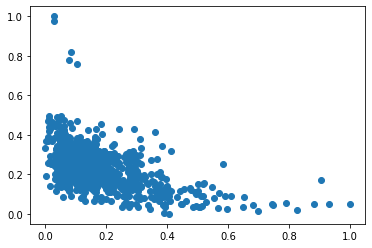

In [47]:
plt.scatter(cleaned_data['Milage'], cleaned_data['Price($)'])
plt.show()

In [78]:
car_cluster = KMeans(n_clusters=15)
y_pred = car_cluster.fit_predict(cleaned_data[['Milage', 'Price($)']])
y_pred

array([ 0,  3,  4,  2,  7,  3,  3,  2, 14,  6,  2,  3, 14,  2, 12, 11,  6,
        3,  2,  6,  4,  2,  1,  0,  4, 13, 11,  0,  2,  0, 13,  0, 12,  7,
       13, 12,  6, 11,  2,  3,  3,  6, 11, 12, 13,  0,  2,  6, 14,  4,  2,
        6,  3,  6,  4, 14, 10,  2, 10,  6,  8, 12,  7,  8, 11,  4, 12,  4,
        0,  4, 10,  1,  0,  9, 10, 14,  2, 12, 11, 10, 12,  4, 13, 12,  4,
        7, 11,  3,  7,  5,  2,  8, 13, 12,  9, 12, 10,  2,  4,  7, 14,  4,
        0,  7,  4,  0, 11, 13,  4,  2, 14,  8,  8,  2, 11,  1, 13, 14,  0,
       13, 14, 13, 14, 13,  6,  0, 14,  6,  0,  6, 11, 13, 14,  2,  0,  6,
        3, 13, 11,  6,  1,  4,  0,  4,  5,  2,  0,  4,  8,  6,  1, 13,  3,
        4, 10, 12, 13,  4, 13, 14,  4,  4, 13, 12,  4,  4, 14,  9,  4,  6,
       14, 14, 10, 11,  4, 12,  8, 13, 11, 13,  6,  0, 14, 11,  0,  2, 12,
        2,  5,  8,  0, 12,  4,  1, 13,  7, 14,  2,  1, 10, 10,  8, 14, 10,
       11, 12,  0,  4, 11, 13, 12,  4,  0, 13,  3, 11, 10,  0,  2,  1,  2,
       13, 11,  0, 13, 12

In [79]:
cleaned_data['Cluster'] = y_pred
cleaned_data

C:\Users\daiya\AppData\Local\Temp\ipykernel_8880\3855439300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = y_pred


,Name,Price($),Milage,Cluster
0,2021 Toyota Camry SE,0.228635,0.043692,0
1,2021 Toyota Supra 3.0 Premium,0.462987,0.023058,3
2,2019 Toyota Sequoia Platinum,0.404195,0.186204,4
3,2019 Toyota Camry SE,0.182650,0.165731,2
4,2017 Toyota Highlander Limited,0.232348,0.286947,7
...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,0.277735,0.038508,0
996,2010 Toyota Prius IV,0.033657,0.649837,1
997,2000 Toyota 4Runner SR5,0.101021,0.493822,1
998,2019 Toyota Corolla LE,0.134653,0.079290,14


In [80]:
car_centroids = car_cluster.cluster_centers_
car_centroids

array([[0.05771745, 0.26776737],
       [0.53470458, 0.09072713],
       [0.20119711, 0.20737015],
       [0.05497914, 0.44579981],
       [0.14131437, 0.31023097],
       [0.82146921, 0.05574492],
       [0.14575801, 0.14086645],
       [0.30468568, 0.18411597],
       [0.38730686, 0.09251989],
       [0.06547619, 0.86678006],
       [0.25233474, 0.10690037],
       [0.27416568, 0.30024634],
       [0.06384167, 0.3501749 ],
       [0.12377374, 0.20972362],
       [0.06041795, 0.18762325]])

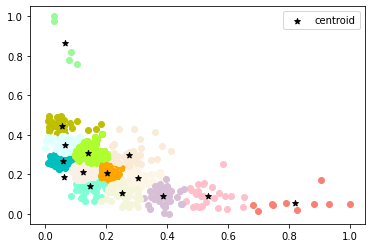

In [84]:
car0 = cleaned_data[cleaned_data.Cluster == 0]
car1 = cleaned_data[cleaned_data.Cluster == 1]
car2 = cleaned_data[cleaned_data.Cluster == 2]
car3 = cleaned_data[cleaned_data.Cluster == 3]
car4 = cleaned_data[cleaned_data.Cluster == 4]
car5 = cleaned_data[cleaned_data.Cluster == 5]
car6 = cleaned_data[cleaned_data.Cluster == 6]
car7 = cleaned_data[cleaned_data.Cluster == 7]
car8 = cleaned_data[cleaned_data.Cluster == 8]
car9 = cleaned_data[cleaned_data.Cluster == 9]
car10 = cleaned_data[cleaned_data.Cluster == 10]
car11 = cleaned_data[cleaned_data.Cluster == 11]
car12 = cleaned_data[cleaned_data.Cluster == 12]
car13 = cleaned_data[cleaned_data.Cluster == 13]
car14 = cleaned_data[cleaned_data.Cluster == 14]



plot_clusters(car0, 'c', 'Milage', 'Price($)')
plot_clusters(car1, 'pink', 'Milage', 'Price($)')
plot_clusters(car2, 'orange', 'Milage', 'Price($)')
plot_clusters(car3, 'y', 'Milage', 'Price($)')
plot_clusters(car4, 'lightcoral', 'Milage', 'Price($)')
plot_clusters(car5, 'salmon', 'Milage', 'Price($)')
plot_clusters(car6, 'aquamarine', 'Milage', 'Price($)')
plot_clusters(car7, 'oldlace', 'Milage', 'Price($)')
plot_clusters(car8, 'thistle', 'Milage', 'Price($)')
plot_clusters(car9, 'palegreen', 'Milage', 'Price($)')
plot_clusters(car10, 'beige', 'Milage', 'Price($)')
plot_clusters(car11, 'antiquewhite', 'Milage', 'Price($)')
plot_clusters(car12, 'lightcyan', 'Milage', 'Price($)')
plot_clusters(car13, 'linen', 'Milage', 'Price($)')
plot_clusters(car4, 'greenyellow', 'Milage', 'Price($)')



plt.scatter(car_centroids[:,0], car_centroids[:,1], color='black', marker='*', label='centroid')
plt.legend()
plt.show()

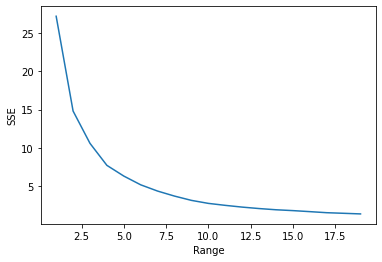

In [77]:
# Elbow Plot
car_sse = []
car_rng = range(1, 20)
for i in car_rng:
    cm = KMeans(n_clusters=i)
    cm.fit(cleaned_data[['Milage', 'Price($)']])
    car_sse.append(cm.inertia_)

plt.plot(car_rng, car_sse)
plt.xlabel('Range')
plt.ylabel('SSE')
plt.show()